In [59]:
import pandas as pd
import numpy as np

data = pd.read_csv('NSQ_OneYear100test_Sept21.csv', 
                   usecols=['Local_Date_Time','RIC','Open','High','Low','Close','VWAP','NumberOfTrades','Volume'],
                   dtype={'Local_Date_Time': str,
                          'RIC': str, 
                          'Open': np.float64,
                          'High': np.float64,
                          'Low': np.float64,
                          'Close': np.float64,
                          'VWAP': np.float64,
                          'NumberOfTrades': int,
                          'Volume': int},
                   skipinitialspace=True,
                   parse_dates=True)

In [2]:
data['Diff_HL'] = data['High'] - data['Low']
data['Diff_Close'] = data['Close'].diff()

In [60]:
data

,Local_Date_Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume
0,2020-09-01 09:30:00,AAPL.O,132.76,132.92,131.49,131.6700,132.656,7032,5143217
1,2020-09-01 09:31:00,AAPL.O,131.71,132.00,131.32,131.6852,131.696,4657,1089138
2,2020-09-01 09:32:00,AAPL.O,131.66,132.00,131.13,131.8100,131.554,4668,1062337
3,2020-09-01 09:33:00,AAPL.O,131.81,131.83,130.81,130.9047,131.158,5074,1147498
4,2020-09-01 09:34:00,AAPL.O,130.91,131.39,130.89,131.3300,131.134,4179,915152
...,...,...,...,...,...,...,...,...,...
9509788,2021-09-01 15:55:00,ZM.O,291.00,291.08,290.89,290.9300,290.973,257,33071
9509789,2021-09-01 15:56:00,ZM.O,290.92,290.98,290.83,290.8975,290.903,179,22543
9509790,2021-09-01 15:57:00,ZM.O,290.85,290.92,290.80,290.8200,290.851,275,42320
9509791,2021-09-01 15:58:00,ZM.O,290.82,290.91,290.71,290.8000,290.807,359,42121


In [4]:
data['Local_Date_Time'] = pd.to_datetime(data['Local_Date_Time'])

In [5]:
data['Date'] = data['Local_Date_Time'].dt.date

In [27]:
apple = data[data['RIC'] == 'AAPL.O']
apple['Volatility'] = np.sqrt(0.5*np.square(np.log(apple['High']/apple['Low'])) - (2*np.log(2)-1)*np.square(np.log(apple['Close']/apple['Open'])))
moderna = data[data['RIC'] == 'MRNA.O']
moderna['Volatility'] = np.sqrt(0.5*np.square(np.log(moderna['High']/moderna['Low'])) - (2*np.log(2)-1)*np.square(np.log(moderna['Close']/moderna['Open'])))
zoom = data[data['RIC'] == 'ZM.O']
zoom['Volatility'] = np.sqrt(0.5*np.square(np.log(zoom['High']/zoom['Low'])) - (2*np.log(2)-1)*np.square(np.log(zoom['Close']/zoom['Open'])))

<ipython-input-27-326db9ed5968>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple['Volatility'] = np.sqrt(0.5*np.square(np.log(apple['High']/apple['Low'])) - (2*np.log(2)-1)*np.square(np.log(apple['Close']/apple['Open'])))
<ipython-input-27-326db9ed5968>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  moderna['Volatility'] = np.sqrt(0.5*np.square(np.log(moderna['High']/moderna['Low'])) - (2*np.log(2)-1)*np.square(np.log(moderna['Close']/moderna['Open'])))
<ipython-input-27-326db9ed5968>:6: SettingWith

### Apple 1 year

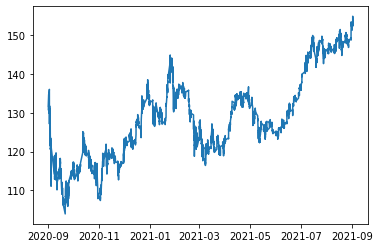

In [65]:
# Plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(apple['Local_Date_Time'], apple['Close'])
plt.show()

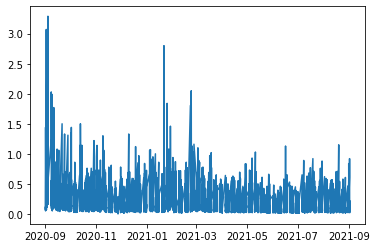

In [67]:
plt.rcParams["figure.figsize"] = (6,4)
plt.plot(apple['Local_Date_Time'], apple['Diff_HL'])
plt.show()

### Apple 1 Month

In [68]:
#### 1 months approx

applemonth = apple[apple['Local_Date_Time'] <= '2020-09-05 16:00:00']

In [69]:
applemonth.head(393)

,Local_Date_Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume,Diff_HL,Diff_Close,Date,Volatility
0,2020-09-01 09:30:00,AAPL.O,132.7600,132.9200,131.49,131.6700,132.656,7032,5143217,1.4300,NaN,2020-09-01,0.005678
1,2020-09-01 09:31:00,AAPL.O,131.7100,132.0000,131.32,131.6852,131.696,4657,1089138,0.6800,0.0152,2020-09-01,0.003650
2,2020-09-01 09:32:00,AAPL.O,131.6600,132.0000,131.13,131.8100,131.554,4668,1062337,0.8700,0.1248,2020-09-01,0.004622
3,2020-09-01 09:33:00,AAPL.O,131.8100,131.8300,130.81,130.9047,131.158,5074,1147498,1.0200,-0.9053,2020-09-01,0.003438
4,2020-09-01 09:34:00,AAPL.O,130.9100,131.3900,130.89,131.3300,131.134,4179,915152,0.5000,0.4253,2020-09-01,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
388,2020-09-01 15:58:00,AAPL.O,134.3500,134.4900,134.31,134.4450,134.401,3508,909836,0.1800,0.0950,2020-09-01,0.000839
389,2020-09-01 15:59:00,AAPL.O,134.4400,134.5400,134.14,134.1900,134.458,6566,2021577,0.4000,-0.2550,2020-09-01,0.001759
390,2020-09-02 09:30:00,AAPL.O,137.6000,137.9800,136.00,136.0600,137.296,9662,5903852,1.9800,1.8700,2020-09-02,0.007451
391,2020-09-02 09:31:00,AAPL.O,136.0700,136.6200,134.35,134.8856,135.206,18060,4249135,2.2700,-1.1744,2020-09-02,0.010528


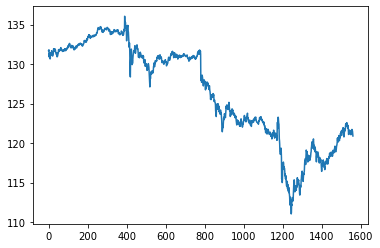

In [70]:
plt.plot(applemonth['Close'])
plt.show()

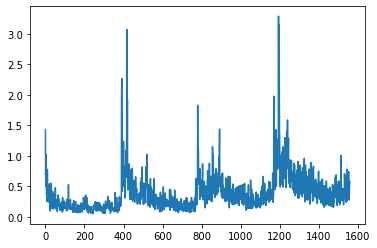

In [71]:
plt.plot(applemonth['Diff_HL'])
plt.show()

### 1 day plots(1st Sep 2020)

In [72]:
# Filter out Apple in September 1, 2020
apple202009 = apple[apple['Local_Date_Time'] <= '2020-09-01 16:00:00']
moderna202009 = moderna[moderna['Local_Date_Time'] <= '2020-09-01 16:00:00']
zoom202009 = zoom[zoom['Local_Date_Time'] <= '2020-09-01 16:00:00']

In [73]:
from datetime import datetime

datetime.strptime('2020-09-01 09:30:00', '%Y-%m-%d %H:%M:%S').month

9

In [74]:
#apple202009['Time'] = apple202009['Local_Date_Time'].dt.time
apple202009['Date'] = pd.to_datetime(apple202009['Date'])

<ipython-input-74-20b970e724ad>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apple202009['Date'] = pd.to_datetime(apple202009['Date'])


In [75]:
apple202009.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 0 to 389
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Local_Date_Time  390 non-null    datetime64[ns]
 1   RIC              390 non-null    object        
 2   Open             390 non-null    float64       
 3   High             390 non-null    float64       
 4   Low              390 non-null    float64       
 5   Close            390 non-null    float64       
 6   VWAP             390 non-null    float64       
 7   NumberOfTrades   390 non-null    int64         
 8   Volume           390 non-null    int64         
 9   Diff_HL          390 non-null    float64       
 10  Diff_Close       389 non-null    float64       
 11  Date             390 non-null    datetime64[ns]
 12  Volatility       390 non-null    float64       
dtypes: datetime64[ns](2), float64(8), int64(2), object(1)
memory usage: 42.7+ KB


In [76]:
apple202009

,Local_Date_Time,RIC,Open,High,Low,Close,VWAP,NumberOfTrades,Volume,Diff_HL,Diff_Close,Date,Volatility
0,2020-09-01 09:30:00,AAPL.O,132.760,132.92,131.49,131.6700,132.656,7032,5143217,1.43,NaN,2020-09-01,0.005678
1,2020-09-01 09:31:00,AAPL.O,131.710,132.00,131.32,131.6852,131.696,4657,1089138,0.68,0.0152,2020-09-01,0.003650
2,2020-09-01 09:32:00,AAPL.O,131.660,132.00,131.13,131.8100,131.554,4668,1062337,0.87,0.1248,2020-09-01,0.004622
3,2020-09-01 09:33:00,AAPL.O,131.810,131.83,130.81,130.9047,131.158,5074,1147498,1.02,-0.9053,2020-09-01,0.003438
4,2020-09-01 09:34:00,AAPL.O,130.910,131.39,130.89,131.3300,131.134,4179,915152,0.50,0.4253,2020-09-01,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...
385,2020-09-01 15:55:00,AAPL.O,133.730,133.92,133.70,133.9019,133.821,1870,398990,0.22,0.1819,2020-09-01,0.000845
386,2020-09-01 15:56:00,AAPL.O,133.905,134.15,133.84,134.1100,134.043,2463,654453,0.31,0.2081,2020-09-01,0.001331
387,2020-09-01 15:57:00,AAPL.O,134.115,134.40,134.11,134.3500,134.272,2744,672830,0.29,0.2400,2020-09-01,0.001072
388,2020-09-01 15:58:00,AAPL.O,134.350,134.49,134.31,134.4450,134.401,3508,909836,0.18,0.0950,2020-09-01,0.000839


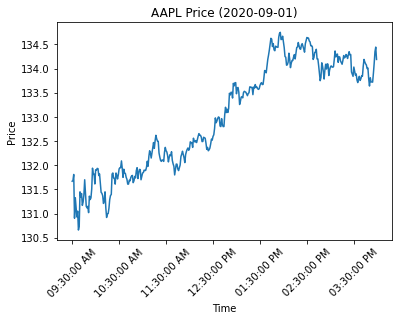

In [84]:
# Plots
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (6,4)
#plt.style.use('seaborn-paper')
x = apple202009['Local_Date_Time'].dt.strftime('%r')
# Time and price
plt.plot(x, apple202009['Close'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('AAPL Price (2020-09-01)')
plt.show()

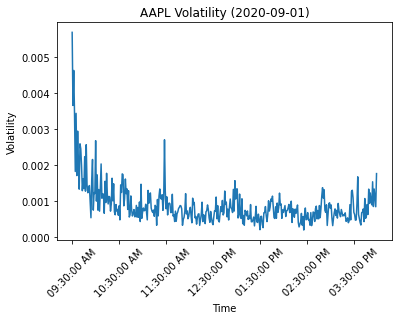

In [83]:
# Time and volatility (difference between high and low)
x = apple202009['Local_Date_Time'].dt.strftime('%r')
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(x, apple202009['Volatility'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('AAPL Volatility (2020-09-01)')
plt.show()


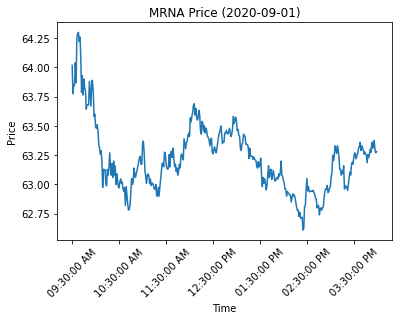

In [82]:
x = moderna202009['Local_Date_Time'].dt.strftime('%r')
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(x, moderna202009['Close'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('MRNA Price (2020-09-01)')
plt.show()

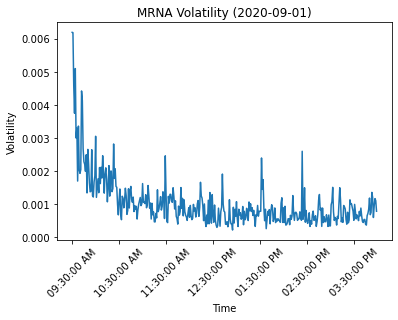

In [81]:
x = moderna202009['Local_Date_Time'].dt.strftime('%r')
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(x, moderna202009['Volatility'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('MRNA Volatility (2020-09-01)')
plt.show()


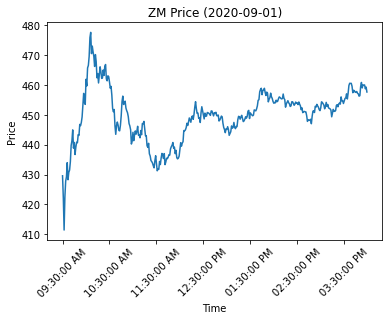

In [85]:
x = zoom202009['Local_Date_Time'].dt.strftime('%r')
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(x, zoom202009['Close'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Price')
plt.title('ZM Price (2020-09-01)')
plt.show()

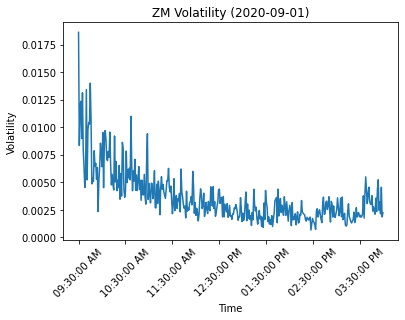

In [86]:
x = zoom202009['Local_Date_Time'].dt.strftime('%r')
plt.rcParams["figure.figsize"] = (6,4)
# Time and price
plt.plot(x, zoom202009['Volatility'])
plt.xticks(np.arange(0, len(x)+1, 60))
plt.xticks(rotation = 45)
plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('ZM Volatility (2020-09-01)')
plt.show()


### ACF/PACF graphs

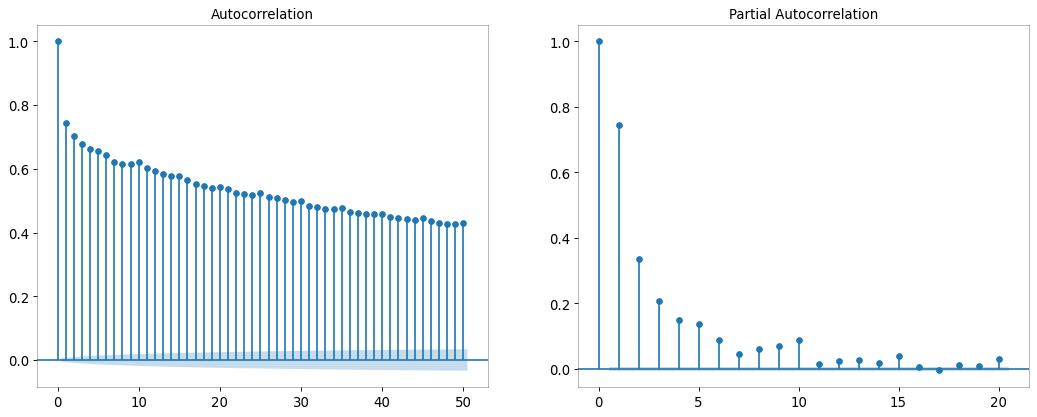

In [52]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6), dpi= 80)
plot_acf(apple.Volatility.tolist(), ax=ax1, lags=50)
plot_pacf(apple.Volatility.tolist(), ax=ax2, lags=20)

# Decorate
# lighten the borders
ax1.spines["top"].set_alpha(.3); ax2.spines["top"].set_alpha(.3)
ax1.spines["bottom"].set_alpha(.3); ax2.spines["bottom"].set_alpha(.3)
ax1.spines["right"].set_alpha(.3); ax2.spines["right"].set_alpha(.3)
ax1.spines["left"].set_alpha(.3); ax2.spines["left"].set_alpha(.3)

# font size of tick labels
ax1.tick_params(axis='both', labelsize=12)
ax2.tick_params(axis='both', labelsize=12)
plt.show()